In [1]:
#Opencvのインポート
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys,os
from PIL import Image
%matplotlib inline

In [2]:
print(cv2)

<module 'cv2' from '/opt/anaconda3/envs/opencv/lib/python3.6/site-packages/cv2.cpython-36m-darwin.so'>


In [3]:
#入力ファイルのパス指定
in_jpg ="miriteko/000001.jpg"

In [4]:
out_jpg = "miriteko_output/000001.jpg"

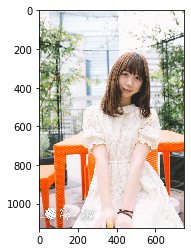

In [5]:
#入力画像の表示
plt.show(plt.imshow(np.asarray(Image.open(in_jpg))))

In [42]:
#画像の読み込み
image_gs = cv2.imread(in_jpg)

In [43]:
#顔認識用の特徴量ファイルを読み込む
cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

In [44]:
#顔認証の実行
face_list = cascade.detectMultiScale(image_gs,scaleFactor=1.1,minNeighbors=1,minSize=(100,100))

In [45]:
#顔が１つ以上検出された時
if len(face_list) > 0:
    for rect in face_list:
        image_gs = image_gs[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#顔が検出されなかった時
else:
    print("no face")

no face


In [46]:
cv2.imwrite(out_jpg,image_gs)

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgcodecs/src/loadsave.cpp:684: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'


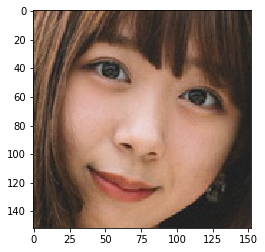

In [14]:
#出力画像の表示
plt.show(plt.imshow(np.asarray(Image.open(out_jpg))))

幸愛フォルダの中の画像を顔認証して切り取る

In [2]:
#入力ファイルのパスを指定
in_jpg = "koume/"
out_jpg = "koume_output/"

In [3]:
#リストで結果を返す関数
def get_file(dir_path):
    filenames = os.listdir(dir_path)
    return filenames

In [4]:
pic = get_file(in_jpg)

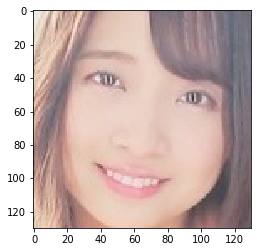

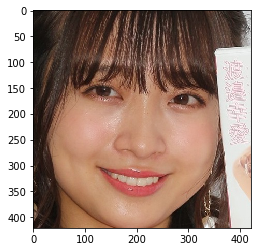

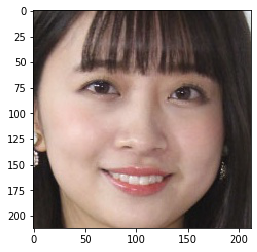

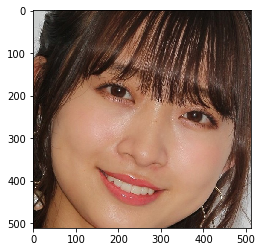

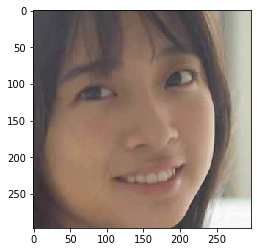

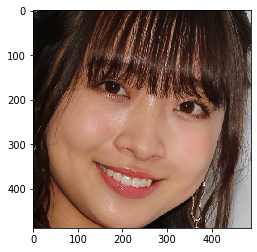

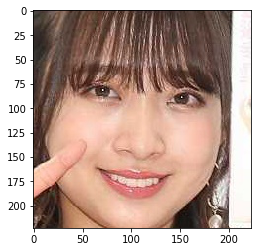

In [9]:
for i in pic:
    # 画像の読み込み 
    image_gs = cv2.imread(in_jpg + i)
 
    # 顔認識用特徴量ファイルを読み込む --- （カスケードファイルのパスを指定）
    cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    
    # 顔認識の実行
    face_list = cascade.detectMultiScale(image_gs,scaleFactor=1.1,minNeighbors=1,minSize=(100,100))
    
    
    # 顔だけ切り出して保存
    no = 1;
    for rect in face_list:
        x = rect[0]
        y = rect[1]
        width = rect[2]
        height = rect[3]
        dst = image_gs[y:y + height, x:x + width]
        save_path = out_jpg + '/' + 'out_('  + str(i) +')' + str(no) + '.jpg'
        
        #認識結果の保存
        a = cv2.imwrite(save_path, dst)
        plt.show(plt.imshow(np.asarray(Image.open(save_path))))
        no += 1
       

画像を100×100にresizeする

In [60]:
pic_out = get_file(out_jpg)
j = 1

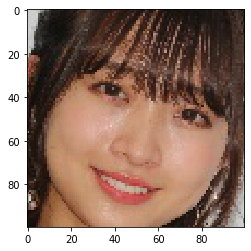

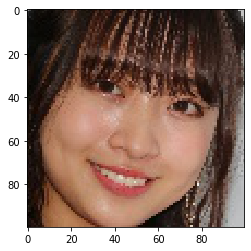

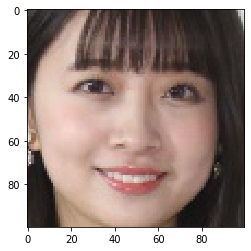

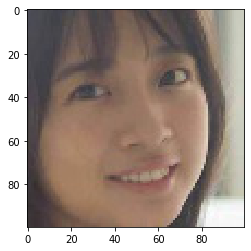

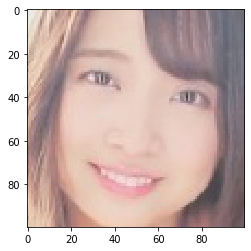

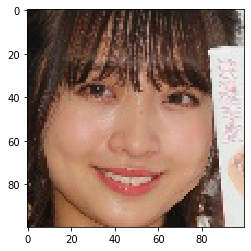

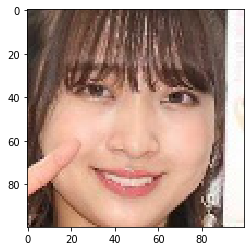

In [61]:
for i in pic_out:
    # 画像の読み込み 
    image_gs = cv2.imread(out_jpg + i)
    resize_img = cv2.resize(image_gs,(100,100))
    save_path = 'koume_output2/koume' + str(j) + '.jpg'
    j = j + 1
    #認識結果の保存
    a = cv2.imwrite(save_path, resize_img)
    plt.show(plt.imshow(np.asarray(Image.open(save_path))))

In [62]:
miri_jpg = "miriteko_output/"
pic_out = get_file(miri_jpg)
j = 1

In [63]:
pic_out

['.DS_Store', 'miri2.jpg', 'miri3.jpg', 'miri1.jpg', 'miri4.jpg', 'miri5.jpg']

In [64]:
pic_out.remove('.DS_Store')

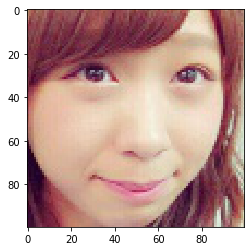

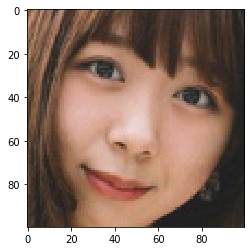

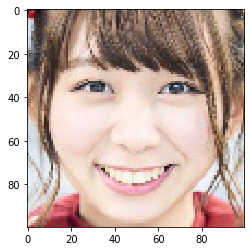

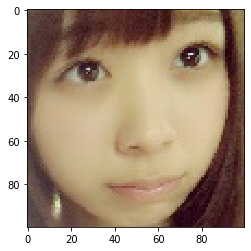

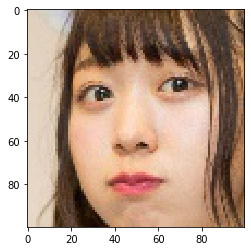

In [65]:
for k in pic_out:
    # 画像の読み込み 
    image_gs = cv2.imread(miri_jpg + k)
    resize_img = cv2.resize(image_gs,(100,100))
    save_path = 'miriteko_output2/miriteko' + str(j) + '.jpg'
    j = j + 1
    #認識結果の保存
    a = cv2.imwrite(save_path, resize_img)
    plt.show(plt.imshow(np.asarray(Image.open(save_path))))